# Install Dependencies


In [1]:
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install datasets
!pip -q install evaluate
!pip install imbalanced-learn
# !pip install torch torchvision torchaudio
!pip install transformers datasets scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 98.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found exis

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Input

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from transformers import RobertaTokenizer



# Tensor Flow

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Check if libraries are installed and print their versions
try:
    print(f"TensorFlow Hub Version: {hub.__version__}")
except ImportError:
    print("TensorFlow Hub is not installed.")

try:
    print(f"TensorFlow Text Version: {text.__version__}")
except ImportError:
    print("TensorFlow Text is not installed.")

try:
    print(f"TensorFlow Version: {tf.__version__}")
except ImportError:
    print("TensorFlow is not installed.")

try:
    print(f"pandas Version: {pd.__version__}")
except ImportError:
    print("pandas is not installed.")

try:
    print(f"scikit-learn Version: {train_test_split.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

try:
    print(f"scikit-learn Version: {classification_report.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

#other usefull

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler


TensorFlow Hub Version: 0.13.0
TensorFlow Text Version: 2.15.0
TensorFlow Version: 2.15.0
pandas Version: 2.2.2
scikit-learn Version: sklearn
scikit-learn Version: sklearn


# Import Github

In [3]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 3.75 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (10/10), done.


# Dataset Location

In [4]:
my_df_loc = '/kaggle/working/Datasets/generated_with_gemini.csv'

# RoBERTa

In [ ]:
!pip install transformers datasets evaluate scikit-learn


In [30]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import evaluate
print("done")




done


In [31]:
# Step 1: Load Dataset
data = pd.read_csv(my_df_loc)

data.dropna(inplace=True)

In [32]:
data.columns

Index(['Generated_using_gemini', 'index_number', 'ClaimLegitimacy',
       'fraud_status'],
      dtype='object')

In [33]:
len(data)

3657

# Train-test Split

In [57]:
# Split into train and test sets

from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['Generated_using_gemini'],  # Features
    data['fraud_status'],           # Labels
    test_size=0.2,                  # Proportion of test data
    stratify=data['fraud_status'],  # Stratify on this column
    random_state=42                 # For reproducibility
)

# over sampling 

In [58]:
# Step 2: Oversampling on Training Data

from imblearn.over_sampling import RandomOverSampler
from datasets import Dataset

In [59]:
# Step 3: Tokenize Data
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [60]:
# Step 2: Apply RandomOverSampler to the raw text and labels

ros = RandomOverSampler(random_state=42)

# Create a DataFrame for the training data
train_data = pd.DataFrame({'Generated_using_gemini': train_texts, 'fraud_status': train_labels})

# Apply RandomOverSampler to oversample text and labels

oversampled_texts, oversampled_labels = ros.fit_resample(
    train_data[['Generated_using_gemini']], train_data['fraud_status']
)

# Flatten the oversampled_texts back into a list

oversampled_texts = oversampled_texts['Generated_using_gemini'].tolist()




In [75]:
# Step 3: Tokenize the oversampled texts
train_encodings = tokenizer(oversampled_texts, truncation=True, padding=True, max_length=200)
input_ids = train_encodings['input_ids']
attention_mask = train_encodings['attention_mask']

In [78]:
type(train_encodings)

transformers.tokenization_utils_base.BatchEncoding

In [74]:
type(oversampled_texts)

list

In [68]:
len(oversampled_texts)

5488

In [69]:
len(oversampled_labels)

5488

In [70]:
oversampled_labels

0       0
1       0
2       0
3       0
4       0
       ..
5483    1
5484    1
5485    1
5486    1
5487    1
Name: fraud_status, Length: 5488, dtype: int64

In [80]:
# Prepare the oversampled training dataset
train_dataset = Dataset.from_dict({
    'input_ids': input_ids,
    'attention_mask': attention_mask,
    'labels': oversampled_labels.tolist()
})

In [81]:
len(train_dataset)

5488

In [82]:
# To check train dataset fraud and not fraud distribution 

from collections import Counter

# Assuming `train_dataset` has the 'labels' field
label_counts = Counter(train_dataset['labels'])

# Print the distribution
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")


Label 0: 2744 samples
Label 1: 2744 samples


In [83]:
len(train_data)

2925

In [84]:
len(train_texts)

2925

In [85]:
len(train_dataset)

5488

In [86]:
# Step 5: Tokenize the test set
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=200)

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels.tolist()
})

In [54]:
len(test_dataset)

732

In [87]:
# Step 4: Define RoBERTa Model

num_labels = len(set(oversampled_labels))  # Calculate the number of unique labels in the resampled dataset
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [88]:
# Step 5: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./roberta-results",           # Directory to save results
    evaluation_strategy="epoch",             # Evaluate at the end of each epoch
    save_strategy="epoch",                   # Save model at the end of each epoch
    learning_rate=2e-5,                      # Learning rate for Adam optimizer
    per_device_train_batch_size=16,          # Batch size per device during training
    per_device_eval_batch_size=16,           # Batch size per device during evaluation
    num_train_epochs=3,                      # Total number of training epochs
    weight_decay=0.01,                       # Weight decay for regularization
    logging_dir="./logs",                    # Directory for storing logs
    logging_steps=10,                        # Log training metrics every 10 steps
    save_total_limit=2,                      # Keep only the last 2 checkpoints
    load_best_model_at_end=True,             # Load the best model at the end of training
    metric_for_best_model="accuracy",        # Metric to select the best model
    fp16=True,                               # Enable mixed precision for faster training
    report_to="none"                         # Disable logging to external tools
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [89]:
#Define Metrics for Evaluation

def compute_metrics(eval_preds):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")  # Weighted for imbalanced data
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }



In [90]:
#  Train and Evaluate

trainer = Trainer(
    model=model,  # Your initialized model (e.g., RobertaForSequenceClassification)
    args=training_args,  # Training arguments defined earlier
    train_dataset=train_dataset,  # Ensure this is in `Dataset` format
    eval_dataset=test_dataset,  # Ensure this is in `Dataset` format
    tokenizer=tokenizer,  # Tokenizer used for the model
    compute_metrics=compute_metrics  # Custom metrics function
)



<ipython-input-90-a37ca8f3ac2b>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [91]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.128800,0.205171,0.946721,0.949557,0.946721,0.948026
2,0.073300,0.151805,0.978142,0.977149,0.978142,0.977139
3,0.000900,0.184345,0.975410,0.974291,0.975410,0.974585


TrainOutput(global_step=1029, training_loss=0.15138226761269963, metrics={'train_runtime': 355.4974, 'train_samples_per_second': 46.313, 'train_steps_per_second': 2.895, 'total_flos': 1692132974784000.0, 'train_loss': 0.15138226761269963, 'epoch': 3.0})

In [92]:
# Step 8: Evaluate Model
results = trainer.evaluate()
print("Evaluation Results:", results)



Evaluation Results: {'eval_loss': 0.1518050581216812, 'eval_accuracy': 0.9781420765027322, 'eval_precision': 0.9771492686223195, 'eval_recall': 0.9781420765027322, 'eval_f1': 0.9771391009442822, 'eval_runtime': 4.725, 'eval_samples_per_second': 154.919, 'eval_steps_per_second': 9.735, 'epoch': 3.0}


# Table

In [71]:
from sklearn.metrics import classification_report

y_pred = trainer.predict(test_dataset).predictions.argmax(axis=-1)
print(classification_report(test_labels, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       679
           1       0.64      0.89      0.74        53

    accuracy                           0.95       732
   macro avg       0.81      0.92      0.86       732
weighted avg       0.97      0.95      0.96       732



In [94]:
# Evaluate the model on the test dataset
results = trainer.evaluate(eval_dataset=test_dataset)

# Extract the accuracy metric
accuracy = results.get("eval_accuracy", None)

if accuracy is not None:
    print(f"Test Accuracy: {accuracy:.4f}")
else:
    print("Accuracy metric not found in the evaluation results.")


Test Accuracy: 0.9781


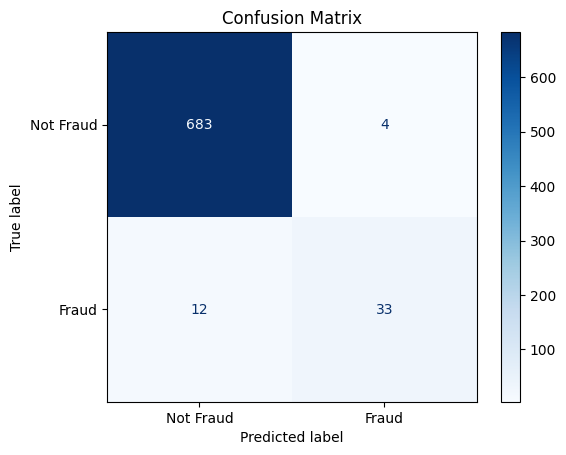

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Extract the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])


disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [97]:
import json
with open("evaluation_results.json", "w") as f:
    json.dump(results, f, indent=4)



# ROC Curve

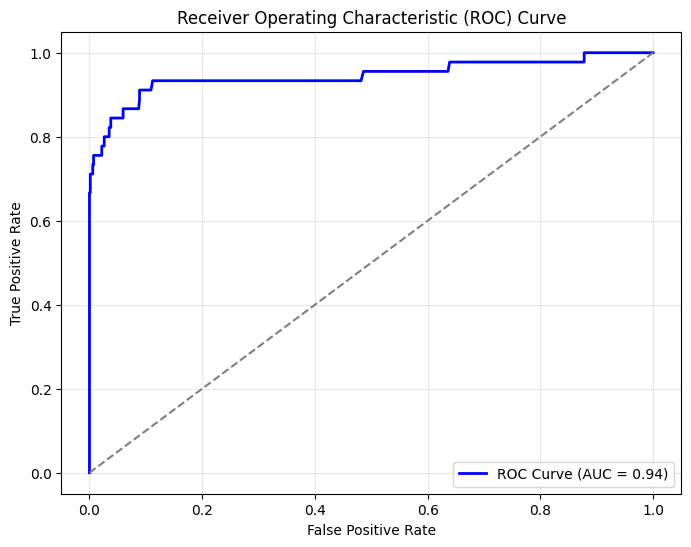

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions and probabilities
predictions = trainer.predict(test_dataset)
true_labels = predictions.label_ids  # True labels from the test dataset
predicted_probabilities = predictions.predictions  # Logits from the model

# For binary classification, calculate probabilities for the positive class
positive_class_probs = np.exp(predicted_probabilities[:, 1]) / np.sum(np.exp(predicted_probabilities), axis=1)

# Step 2: Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, positive_class_probs)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
